In [137]:
import keras 
from keras.models import Sequential 
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pickle
import pandas as pd
import numpy as np
import random 

In [142]:
data = pd.read_csv("/content/drive/MyDrive/traffic-signs/signnames.csv")

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ClassId   43 non-null     int64 
 1   SignName  43 non-null     object
dtypes: int64(1), object(1)
memory usage: 816.0+ bytes


**Pickle for our testing, validating and training purposes**

In [139]:
with open('/content/drive/MyDrive/traffic-signs/train.p', mode='rb') as training:
  train = pickle.load(training)
with open('/content/drive/MyDrive/traffic-signs/test.p', mode='rb') as testing:
  test = pickle.load(testing)
with open('/content/drive/MyDrive/traffic-signs/valid.p',mode='rb') as validation:
  valid = pickle.load(validation)

In [143]:
x_train, y_train = train['features'], train['labels']
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [56]:
print(x_test.shape)
print(x_train.shape)
print(x_validation.shape)

(12630, 32, 32, 3)
(34799, 32, 32, 3)
(4410, 32, 32, 3)


**Visualisation for our x_'s**

Image Label = 31


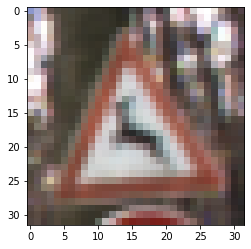

In [144]:
index = np.random.randint(1,len(x_train))
plt.imshow(x_train[index])
print('Image Label = {}'.format(y_train[index]))

**Image Pre-Processing**

1.   Grey-scaling
2.   Histogram Equalisation
1.   Normalise


In [145]:
from sklearn.utils import shuffle
x_train , y_train = shuffle(x_train,y_train)

**OPEN CV**

In [146]:
def preprocessing(img):
  #Converting to greay-scale
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  #HE
  img = cv2.equalizeHist(img)
  #Img-Norm
  img = img/255
  return img


In [147]:
#Applying pre-processing to all our images
x_train_processed = np.array(list(map(preprocessing,x_train)))
x_validation_processed = np.array(list(map(preprocessing,x_validation)))
x_test_processed = np.array(list(map(preprocessing,x_test)))

In [148]:
x_train_processed = x_train_processed.reshape(34799,32,32,1)
x_validation_processed = x_validation_processed.reshape(4410,32,32,1)
x_test_processed = x_test_processed.reshape(12630,32,32,1)

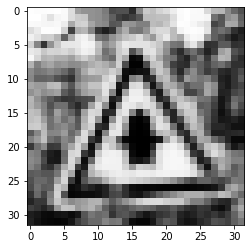

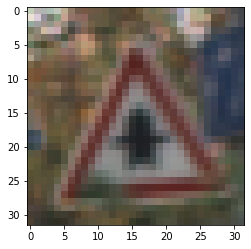

In [149]:
i = random.randint(1,len(x_train))
plt.imshow(x_train_processed[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(x_train[i].squeeze())

**Building our CNN model using Keras**

In [150]:
model = Sequential()

**Adding the Convolutional Model**

In [151]:
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,1)))
#Pooling our layer with MaxPool
model.add(MaxPooling2D(pool_size=(2,2)))

**Placing a drop-out layer**

In [152]:
model.add(Dropout(0.25))

**Adding another CN Layer**

In [153]:
model.add(Conv2D(64,(5,5),activation='relu'))
#Pooling 
model.add(MaxPooling2D(pool_size=(2,2)))
#Flatten into 1-d
model.add(Flatten())


**Adding a Dense Layer**

In [154]:
model.add(Dense(256,activation='relu'))

**Placing our Drop-out layer**

In [155]:
model.add(Dropout(0.5))

**Defining our Output Layer of our NN**

In [156]:
model.add(Dense(43,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)              

**#Comipling our model with Adam of keras optimizers**

In [159]:
model.compile(Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**Training our model, to re-train just change epoch values**

In [160]:
history = model.fit(x_train_processed, y_train,batch_size=500,epochs=10,verbose=1,validation_data=(x_validation_processed,y_validation))

Epoch 1/10
70/70 [==============================] - 57s 797ms/step - loss: 3.6473 - accuracy: 0.0470 - val_loss: 3.4485 - val_accuracy: 0.1984
Epoch 2/10
70/70 [==============================] - 56s 799ms/step - loss: 3.3454 - accuracy: 0.1373 - val_loss: 2.9620 - val_accuracy: 0.3474
Epoch 3/10
70/70 [==============================] - 56s 800ms/step - loss: 2.7685 - accuracy: 0.3154 - val_loss: 2.2842 - val_accuracy: 0.4558
Epoch 4/10
70/70 [==============================] - 56s 802ms/step - loss: 2.2289 - accuracy: 0.4219 - val_loss: 1.8435 - val_accuracy: 0.5236
Epoch 5/10
70/70 [==============================] - 56s 800ms/step - loss: 1.8735 - accuracy: 0.4909 - val_loss: 1.5382 - val_accuracy: 0.5844
Epoch 6/10
70/70 [==============================] - 56s 801ms/step - loss: 1.5955 - accuracy: 0.5513 - val_loss: 1.3162 - val_accuracy: 0.6460
Epoch 7/10
70/70 [==============================] - 56s 800ms/step - loss: 1.4149 - accuracy: 0.5899 - val_loss: 1.1599 - val_accuracy: 0.6664

**Evaluating the performance of our CNN model**

In [161]:
score = model.evaluate(x_test_processed,y_test)
print("The test accuracy is:",score[1])

395/395 [==============================] - 6s 14ms/step - loss: 0.8944 - accuracy: 0.7623
The test accuracy is: 0.7623119354248047


In [162]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Data Visualisation & idea about overfitting**

Text(0.5, 0, 'Epochs')

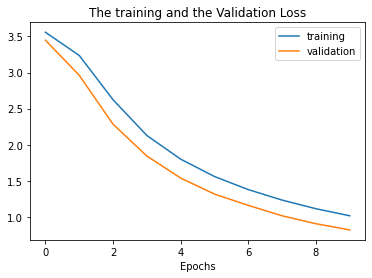

In [163]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('The training and the Validation Loss')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

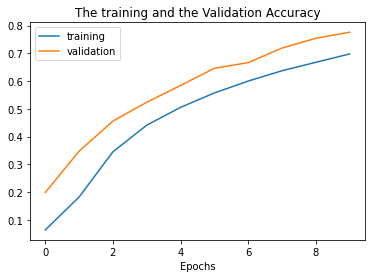

In [164]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('The training and the Validation Accuracy')
plt.xlabel('Epochs')

In [165]:
prediction = model.predict(x_test_processed).argmax(axis=1)
y_true_label = y_test

**Visualising of our model in Matrix**

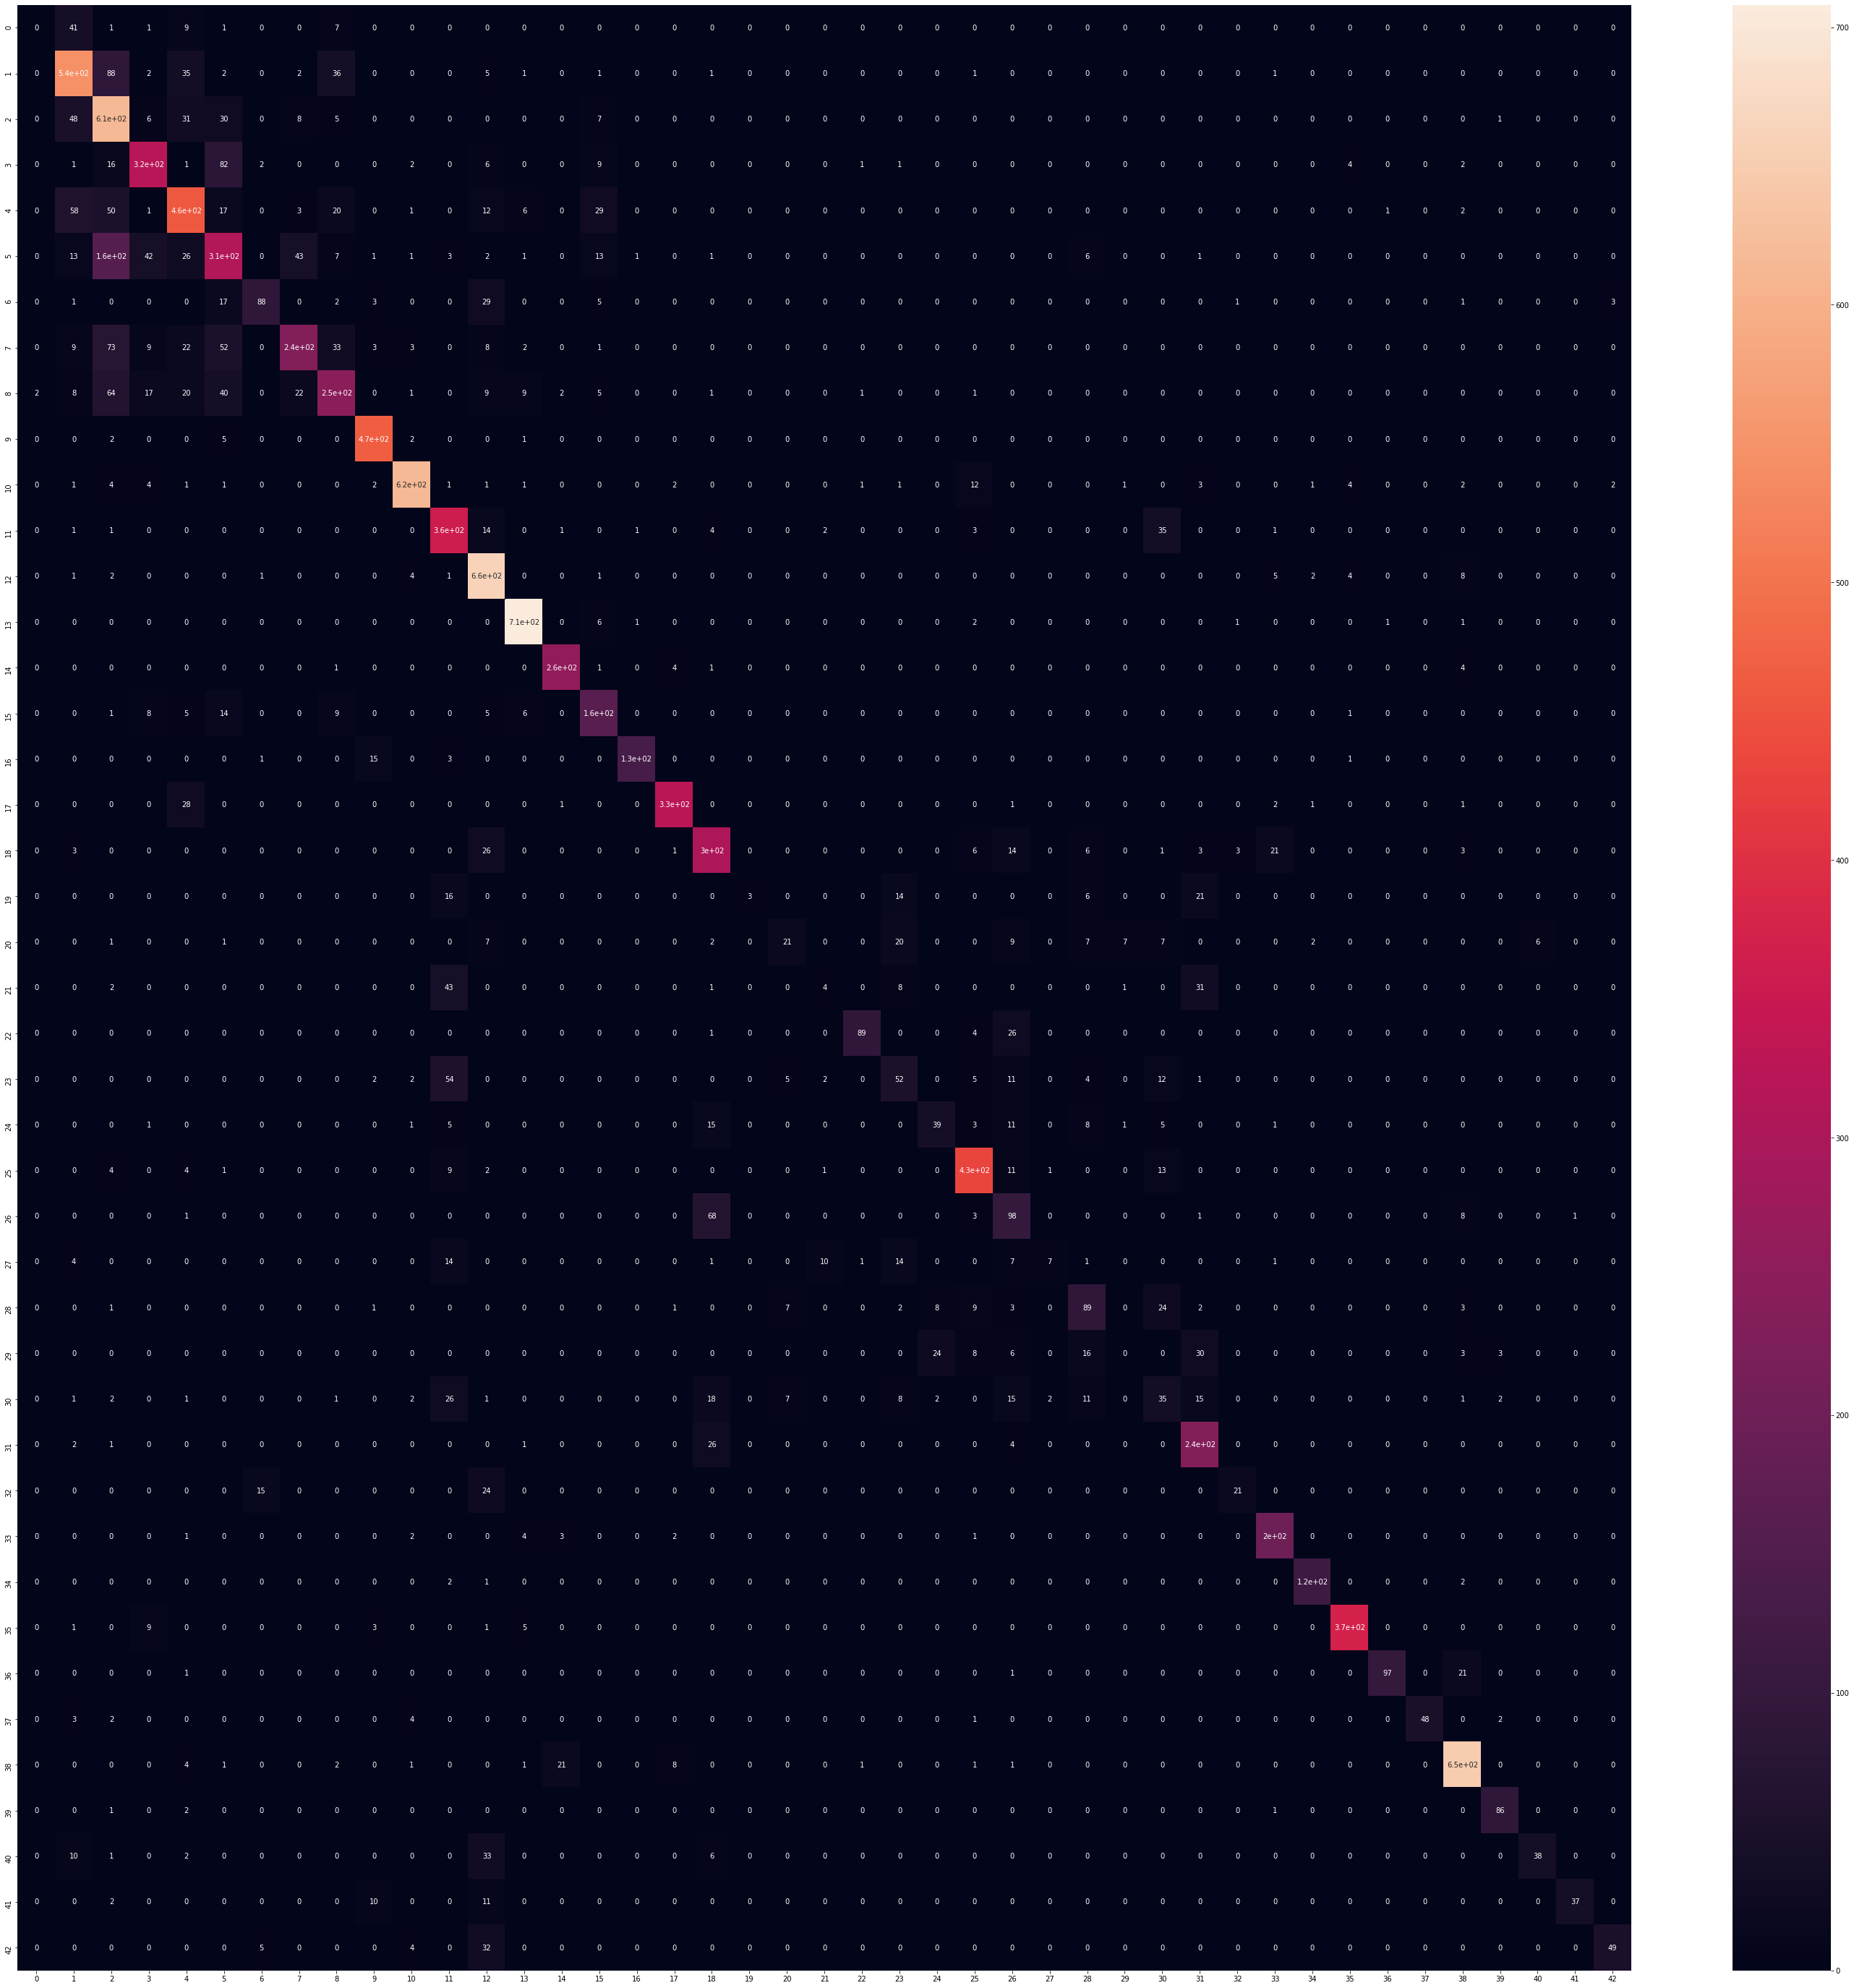

In [166]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true_label,prediction)
plt.figure(figsize=(50,50))
sns.heatmap(matrix,annot=True)

**Image Classification with True values and labeling our images accordingly**

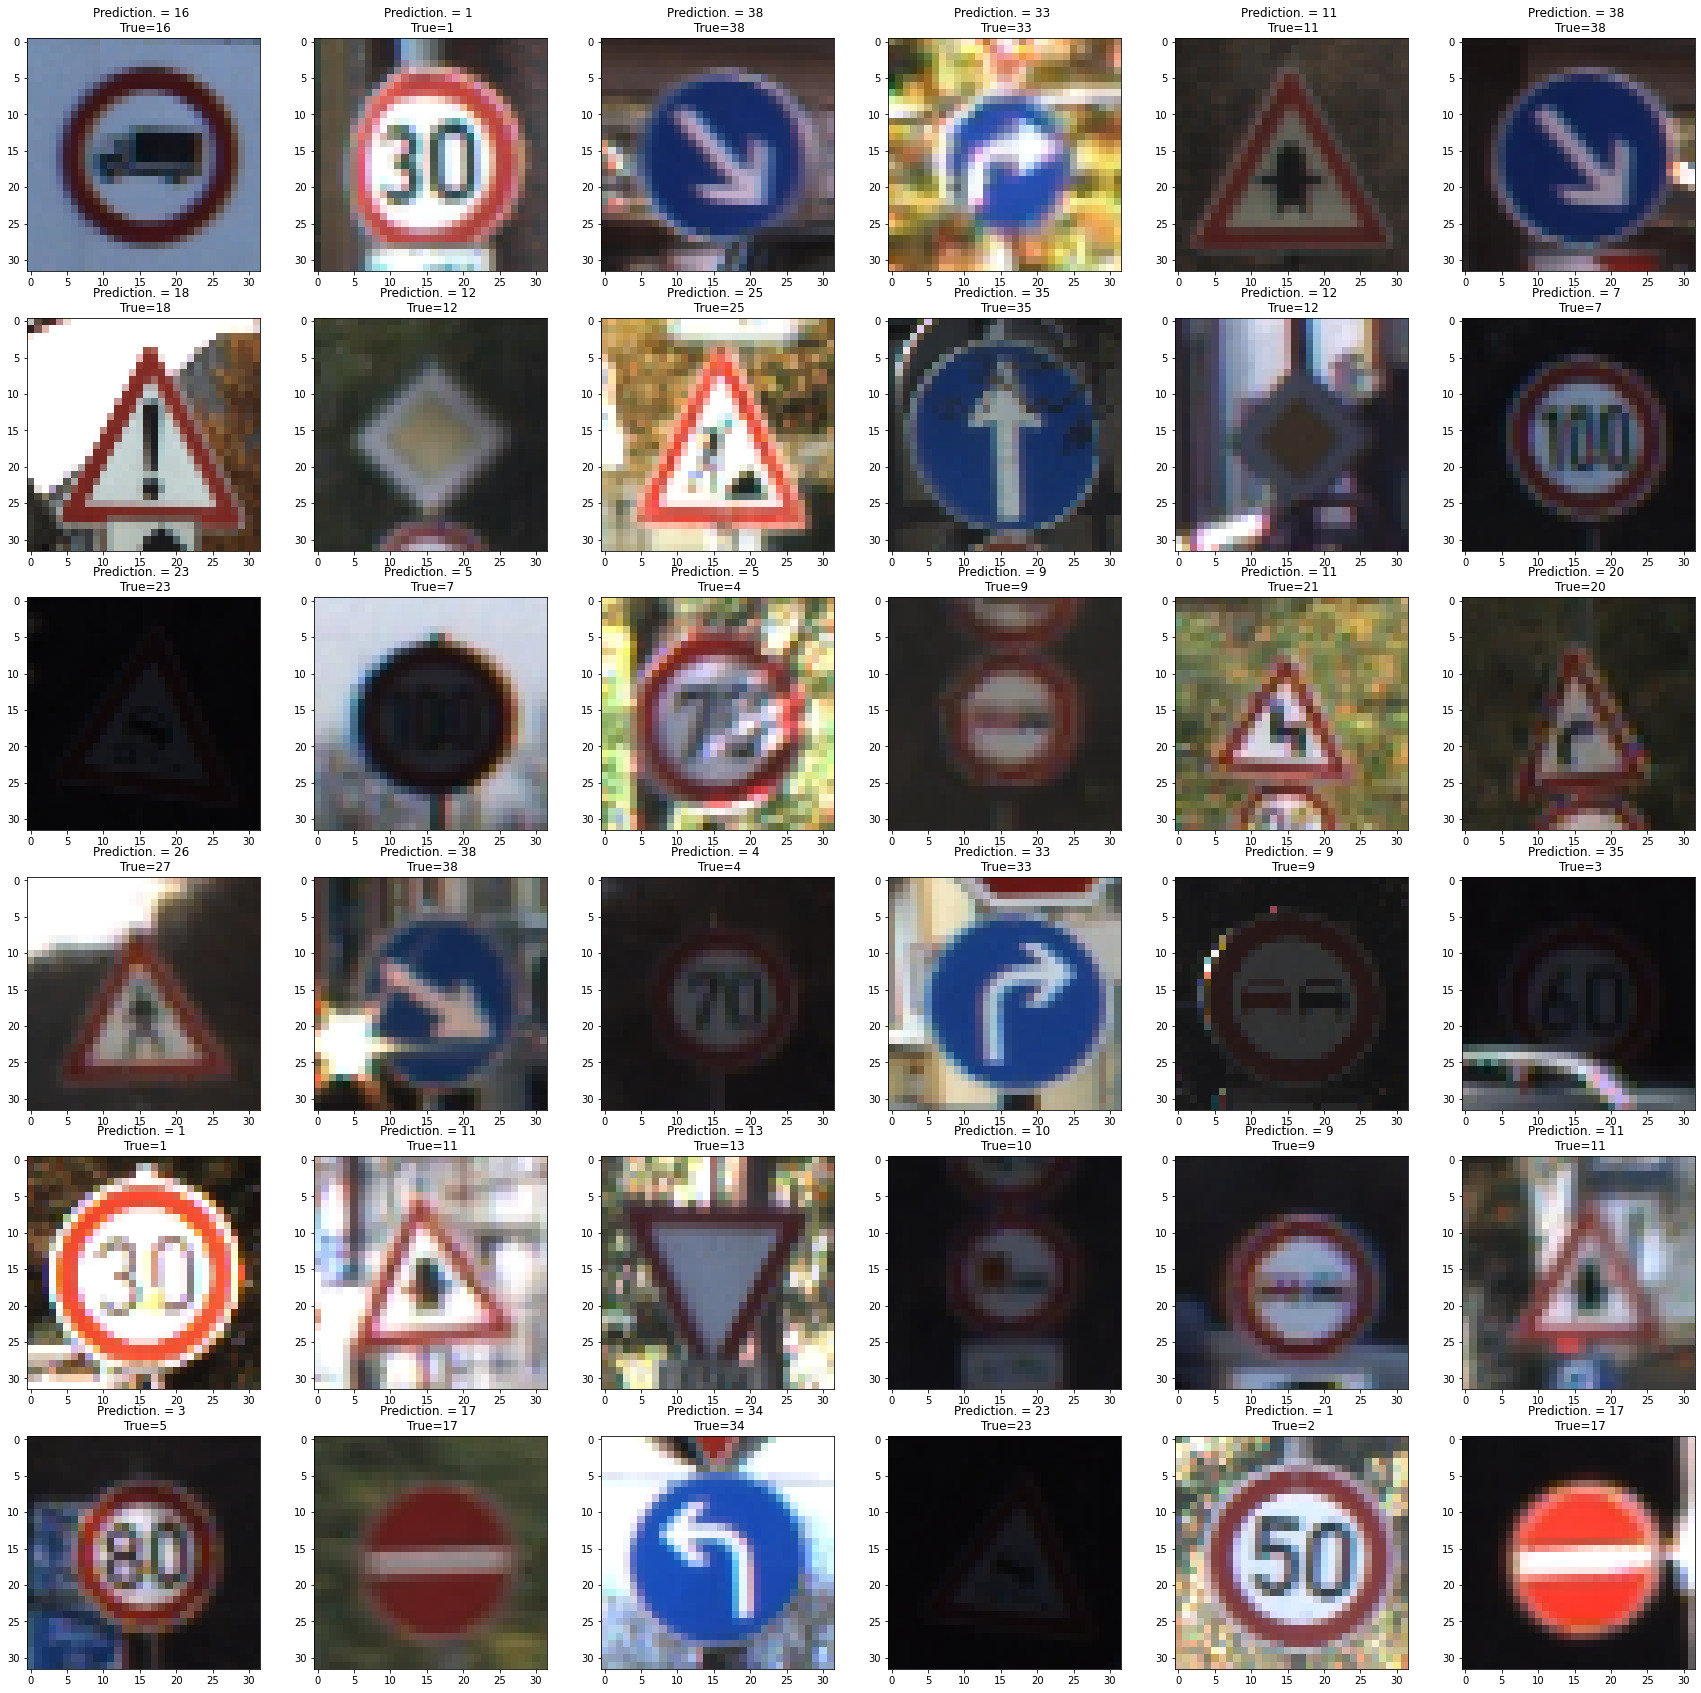

In [167]:
l = 6
w = 6
fig, axes = plt.subplots(l,w,figsize=(30,30))
axes = axes.ravel()
for i in range(0,l*w):
  axes[i].imshow(x_test[i])
  axes[i].set_title("Prediction. = {} \n True={}".format(prediction[i],y_true_label[i]))


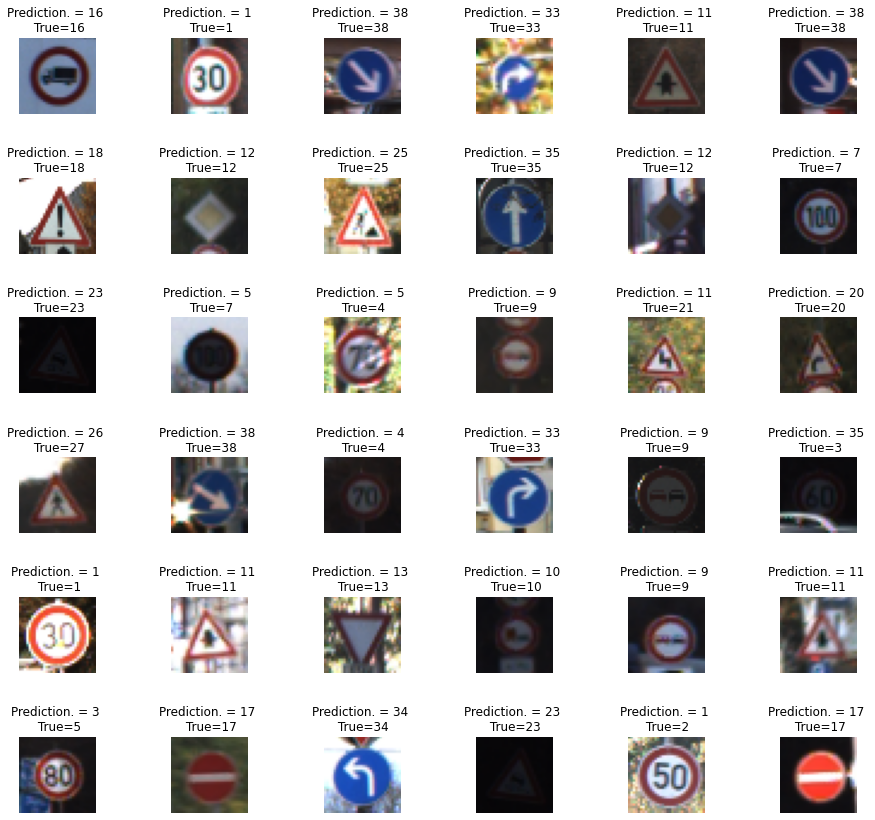

In [168]:
l = 6
w = 6
fig, axes = plt.subplots(l,w,figsize=(15,15))
axes = axes.ravel()
for i in range(0,l*w):
  axes[i].imshow(x_test[i])
  axes[i].set_title("Prediction. = {} \n True={}".format(prediction[i],y_true_label[i]))
  axes[i].axis('Off')
plt.subplots_adjust(wspace=1)

In [170]:
model.save('My_CNN_MODEL.h5')